In [31]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
os.chdir("../")

In [3]:
data_path="data/processed/data_processed_v0.csv"

In [4]:
df = pd.read_csv(data_path)

In [5]:
df.head()

,merchant,category,amt,gender,state,zip,city_pop,job,unix_time,is_fraud,...,day,hour,dayofweek,merchant_encoded,category_encoded,gender_encoded,job_encoded,state_encoded,age,distance_km
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,29209,333497,Mechanical engineer,1371816865,0,...,21,12,6,0.001959,130085,0,8062,0.005655,57,24.613746
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,84002,302,"Sales professional, IT",1371816873,0,...,21,12,6,0.002299,130085,1,8052,0.003972,35,104.834043
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,11710,34496,"Librarian, public",1371816893,0,...,21,12,6,0.001214,122553,1,8773,0.006113,55,59.204796
3,fraud_Haley Group,misc_pos,60.05,M,FL,32780,54767,Set designer,1371816915,0,...,21,12,6,0.004274,114229,0,2208,0.005496,38,27.615117
4,fraud_Johnston-Casper,travel,3.19,M,MI,49632,1126,Furniture designer,1371816917,0,...,21,12,6,0.001665,57956,0,2934,0.004542,70,104.423175


In [21]:
scaler = StandardScaler().set_output(transform="pandas")

In [11]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'city_pop',
       'job', 'unix_time', 'is_fraud', 'year', 'month', 'day', 'hour',
       'dayofweek', 'merchant_encoded', 'category_encoded', 'gender_encoded',
       'job_encoded', 'state_encoded', 'age', 'distance_km'],
      dtype='object')

In [12]:
features = ['merchant_encoded', 'category_encoded','amt', 'gender_encoded', 'state_encoded', 'zip','city_pop', 'job_encoded', 'year', 'month', 'day', 'hour', 'dayofweek' ]

In [13]:
target = 'is_fraud'

In [14]:
x = df[features]
y = df[target]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
x_train.shape

(1296675, 13)

In [18]:
x_test.shape

(555719, 13)

In [20]:
x_train

,merchant_encoded,category_encoded,amt,gender_encoded,state_encoded,zip,city_pop,job_encoded,year,month,day,hour,dayofweek
1341710,0.009629,176191,86.08,0,0.004772,63021,92608,2190,2019,12,1,10,6
532137,0.003530,114229,37.30,0,0.005463,53924,1360,4400,2020,12,27,3,6
828776,0.011223,176191,88.88,1,0.006382,38079,5577,3677,2019,5,15,3,2
1620841,0.007690,166463,450.86,0,0.005165,87533,18408,8787,2020,3,17,19,1
526588,0.013557,90654,172.85,1,0.005655,29438,2408,8052,2020,12,25,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.002365,175460,89.37,0,0.005208,61335,532,8801,2020,9,24,15,3
1414414,0.000731,130085,8.11,0,0.006538,22311,321490,5862,2019,12,16,21,0
131932,0.010262,176191,201.98,1,0.005463,31046,3343,2187,2020,8,6,7,3
671155,0.000821,122553,74.28,0,0.005010,15324,632,6586,2019,3,6,13,2


In [22]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [23]:
scaled_x_train.head()

,merchant_encoded,category_encoded,amt,gender_encoded,state_encoded,zip,city_pop,job_encoded,year,month,day,hour,dayofweek
1341710,0.893534,0.946972,0.101198,-1.100743,-0.407457,0.527754,0.012299,-1.193020,-1.002500,1.415519,-1.673154,-0.412780,1.379267
532137,-0.338921,-0.863646,-0.208196,-1.100743,0.240689,0.189591,-0.289557,-0.426105,0.997507,1.415519,1.255976,-1.439910,1.379267
828776,1.215670,0.946972,0.118957,0.908477,1.103620,-0.399415,-0.275607,-0.677001,-1.002500,-0.627684,-0.095930,-1.439910,-0.440316
1620841,0.501689,0.662705,2.414862,-1.100743,-0.038646,1.438938,-0.233161,1.096273,0.997507,-1.211457,0.129388,0.907817,-0.895212
526588,1.687441,-1.552542,0.651548,0.908477,0.421447,-0.720627,-0.286090,0.841213,0.997507,1.415519,1.030658,0.761084,0.469476


In [25]:
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(scaled_x_train, y_train)

In [26]:
predictions = model.predict(scaled_x_test)

#### Metrics Computation

In [28]:
model.score(scaled_x_train, y_train)

0.9998866331193245

In [ ]:
model.score(scaled_x_test, y_test)

0.9981069569332702

In [29]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    552829\n           1       0.94      0.68      0.79      2890\n\n    accuracy                           1.00    555719\n   macro avg       0.97      0.84      0.89    555719\nweighted avg       1.00      1.00      1.00    555719\n'

In [32]:
y_train.value_counts()

is_fraud
0    1289914
1       6761
Name: count, dtype: int64

In [35]:
y_test.value_counts()

is_fraud
0    552829
1      2890
Name: count, dtype: int64

In [33]:
cm = confusion_matrix(y_test, predictions, labels=[0,1])

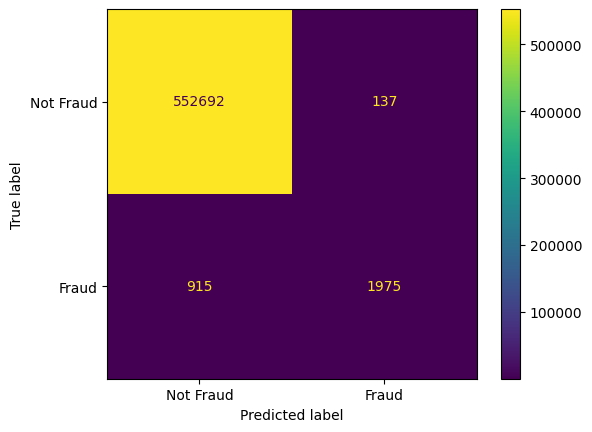

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
